<a href="https://colab.research.google.com/github/ahmedrehman16/Climate-Change-Factors-Analysis/blob/main/ANN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 125204 bytes


In [3]:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign: 357
Malignant: 212


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


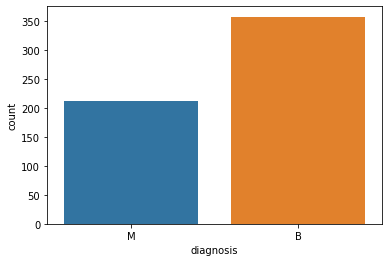

In [4]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label = 'Count')
B, M = data['diagnosis'].value_counts()
print('Benign: '+ str(B))
print('Malignant: ' + str(M))

In [15]:
data = data.drop(['Unnamed: 32'], axis=1)

In [29]:
import numpy as np
import matplotlib.pyplot as plt

X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorial data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# Input and first layer
classifier = Sequential()
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))

# Second Layer
classifier.add(Dense(16, kernel_initializer='uniform', activation='relu'))

# Output Layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [31]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.6152
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.6437
Epoch 3/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6328
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.6503
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.7147
Epoch 6/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7887
Epoch 7/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.8300
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.8774
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.9068
Epoch 10/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.9233
Epoch 11/150
5/5 [===========

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

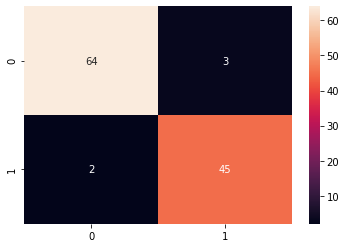

In [35]:
sns.heatmap(cm, annot=True)